### This notebook is used to analysis trading results from HCC

In [1]:
### For stock trading part
from function import *

train_ind = 3
prefix_market = 'sp500'
#prefix_market = 'FTSE100'
base_os = 'G:\\Data\\Machine_Learning_Library\\spring_board_data_science\\Capstone\\Capstone1\\data'
#os1 = os.path.join(base_os, prefix_market,'cleaned_data')
#os2 = os.path.join(base_os, prefix_market,'download_data_revise')
start_date = '2005-01-01'
end_date = '2020-01-01'
##load all data
filename = prefix_market + "_matrix_utd.csv"
origdat_matrix = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='symbol')
origdat_matrix.columns = origdat_matrix.columns.astype('datetime64[ns]')
print("The size of \"{}\" is: {}".format(filename, origdat_matrix.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Close.csv"
origdat = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
##clean origdat
origdat = rm_extreme_price(origdat)
print("The size of \"{}\" is: {}".format(filename, origdat.shape))

filename = prefix_market + "_all_download_data_01-01-2005_12-31-2019_Adj Open.csv"
origdat_o = pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, origdat_o.shape))

filename = prefix_market + "_index_data_01-01-2000_05-20-2020.csv"
sp500 =  pd.read_csv(os.path.join(base_os,filename),sep=",",index_col='date',parse_dates = True)
print("The size of \"{}\" is: {}".format(filename, sp500.shape))

sp500 = pd.DataFrame(sp500['Close'])
sp500.columns = ['SP500']
#sp500.head()
origdat = origdat.merge(sp500, how = 'left', left_index=True, right_index=True)



#set for training periods
first_period1 = [datetime.strptime(item,'%Y-%m-%d') for item in ['2005-01-01', '2008-01-01', '2009-01-01']]
nrows1 = diff_year(datetime.strptime('2009-01-01','%Y-%m-%d'),datetime.strptime('2020-01-01','%Y-%m-%d'))+1
periods1=[]
for i in range(nrows1):
    periods1.append(list(map(lambda period: add_years(period,i), first_period1)))
    
periods1 = pd.DataFrame(periods1)
periods1.columns = ['train_start','trad_start','trad_end']
periods1 = periods1.apply(pd.to_datetime)

#set_dict1
set_dict1 = data_quality(nrows1,periods1,origdat_matrix,origdat) 
m = list(range(1,21))
for k in range(2,13):
    m.append(k*20)

Using TensorFlow backend.


The size of "sp500_matrix_utd.csv" is: (711, 145)
remove stocks: ['TIE', 'BMC', 'PCL', 'POM', 'GAS', 'EMC', 'HOT', 'HAR', 'CHK', 'SCG']
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Close.csv" is: (3774, 626)
The size of "sp500_all_download_data_01-01-2005_12-31-2019_Adj Open.csv" is: (3774, 636)
The size of "sp500_index_data_01-01-2000_05-20-2020.csv" is: (5128, 5)


In [2]:
#load sp500 index
base_os = 'G:\\Data\\Machine_Learning_Library\\spring_board_data_science\\Capstone\\Capstone1\\data\\'
file = open(base_os+"sp500_index_01-01-2005-12-31-2019.csv",'rb')
sp500_ind =  pd.read_csv(file,sep=",",index_col='Date',parse_dates = True)
avg_total = dict()
avg_sp500 = []

Test_set 0, cumulated daily return: 0.2333%, sp500: -0.1861%
Test_set 1, cumulated daily return: 0.3443%, sp500: 0.0713%
Test_set 2, cumulated daily return: 0.0363%, sp500: 0.0414%
Test_set 3, cumulated daily return: 0.1949%, sp500: -0.0045%
Test_set 4, cumulated daily return: 0.0296%, sp500: 0.0442%
Test_set 5, cumulated daily return: 0.0242%, sp500: 0.093%
Test_set 6, cumulated daily return: -0.0116%, sp500: 0.0463%
Test_set 7, cumulated daily return: 0.0078%, sp500: -0.0028%
Test_set 8, cumulated daily return: -0.0386%, sp500: 0.0423%
Test_set 9, cumulated daily return: -0.0416%, sp500: 0.0674%
Test_set 10, cumulated daily return: 0.0407%, sp500: -0.0289%
Test_set 11, cumulated daily return: 0.0557%, sp500: 0.0994%


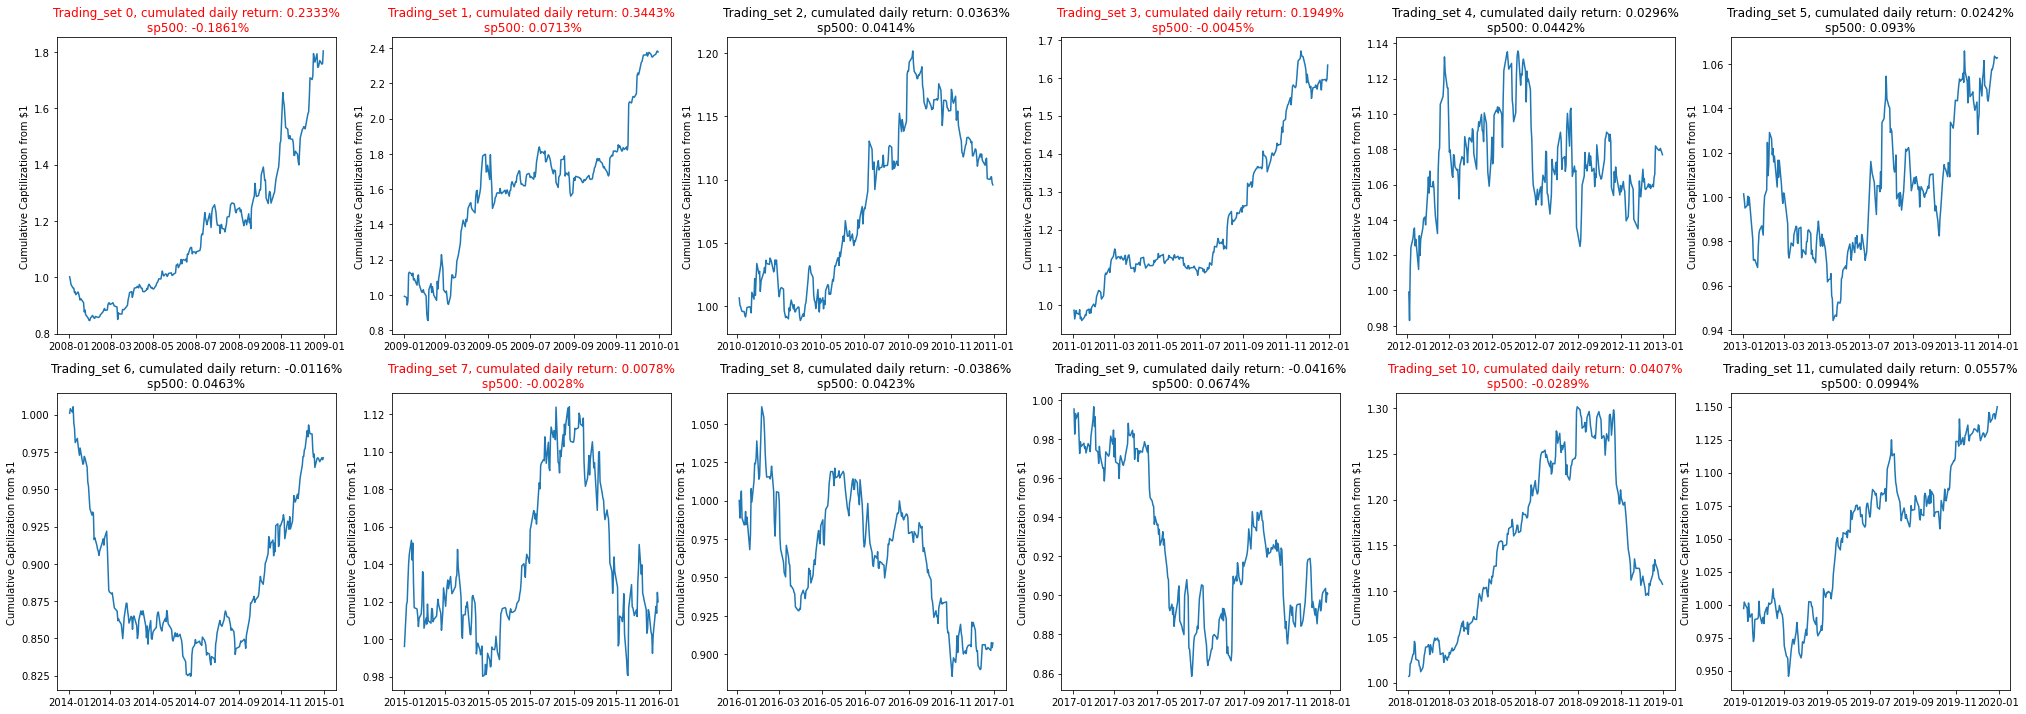

In [19]:
sel_k=3
base_os = 'G:\\Data\\Machine_Learning_Library\\spring_board_data_science\\Capstone\\Capstone1\\result\\trade_result\\all'+str(sel_k)+'\\'
avg_sp500 = []

#train_ind = 8
fig, axs = plt.subplots(2,6, figsize=(35, 12), facecolor='w', edgecolor='k')
for train_ind in range(12):
    file = open(base_os+"result_trade_"+"set_"+str(train_ind)+"sel_"+str(sel_k)+"_acc.pkl", 'rb')
    # dump information to that file
    avg_ret = pickle.load(file)
    
    # check and clean avg_ret (need to check and clean origdat later)
    for i in range(len(avg_ret)):
        if abs(avg_ret[i])>=3:
            print(avg_ret[i])
            avg_ret[i] = 0

    # get cumulative return
    cum_ret = np.cumprod(1+np.array(avg_ret),dtype=float)
    '''
    plt.figure(figsize=(10,7))
    plt.hist(avg_ret,histtype='stepfilled',alpha=0.5)
    plt.axvline(np.mean(avg_ret),color='r')
    plt.text(np.mean(avg_ret),50,'mean='+ str(round(np.mean(avg_ret),4)),rotation=0)
    np.mean(avg_ret)
    '''
    # get time index
    base_os2 = 'G:\\Data\\Machine_Learning_Library\\spring_board_data_science\\Capstone\\Capstone1\\clean_data\\'
    train_file = "set"+str(train_ind)+"_Feature.csv"
    target_file = "set"+str(train_ind)+"_Target.csv"
    X = pd.read_csv(base_os2+train_file,index_col=0)
    y = pd.read_csv(base_os2+target_file, index_col=0)
        
    cur_key = set_dict1[periods1.iloc[train_ind,0]]
    start_date = periods1.iloc[train_ind,0]
    end_date = periods1.iloc[train_ind,1]

    #print(cur_key[-10:]+["SP500"])
    cur_dat = origdat.loc[start_date:end_date,cur_key]
    #cur_dat.fillna(method = 'ffill',inplace=True)
    cur_dat.fillna(method = 'ffill',inplace=True)

    trad_key = set_dict1[periods1.iloc[train_ind,0]]
    start_date = periods1.iloc[train_ind,0]
    end_date = periods1.iloc[train_ind,2]
    
    #print(cur_key[-10:]+["SP500"])
    total_dat = origdat.loc[start_date:end_date,cur_key]
    #cur_dat.fillna(method = 'ffill',inplace=True)
    total_dat.fillna(method = 'ffill',inplace=True)
    #use mean to replace 0
    total_dat = total_dat.apply(lambda x: x.replace(0,x.mean()), axis = 0)
    total_dat.head()
    
    start_dat1 = cur_dat.shape[0]
    end_dat1 = total_dat.shape[0]
    
    
    time_index = total_dat.iloc[start_dat1:end_dat1,:].index
    # get cumulative return
    lst_ret = cum_ret[-1]
    lst_ret = round((lst_ret**(1/len(cum_ret))-1)*100,4)
    # store cumulative return
    '''
    if train_ind == 0:
        avg_total[sel_k] = [lst_ret]
    else:
        avg_total[sel_k].append(lst_ret)
    '''

    # get cumulative return for sp500 in the same time period as baseline
    sp500_close = sp500_ind.loc[time_index[0]:time_index[-1],'Adj Close']
    sp500_ret = (sp500_close[-1]/sp500_close[0])**(1/sp500_close.shape[0])-1
    sp500_ret = round(sp500_ret*100,4)
    # store sp500
    avg_sp500.append(sp500_ret)

    #plot the cumulative return
    #print(int(np.floor(train_ind/4)),int(train_ind%4))
    axs[int(np.floor(train_ind/6)),train_ind%6].plot(time_index,cum_ret)
    #plt.title('Cumulative Return with stacking Ensemble method of knn,lg,raf,xgboost')
    if lst_ret>sp500_ret:
        axs[int(np.floor(train_ind/6)),train_ind%6].set_title('Trading_set '+str(train_ind)+', cumulated daily return: ' + str(lst_ret) + '%\n '+'sp500: ' + str(sp500_ret) +'%',color='r')
    else:
        axs[int(np.floor(train_ind/6)),train_ind%6].set_title('Trading_set '+str(train_ind)+', cumulated daily return: ' + str(lst_ret) + '%\n'+'sp500: ' + str(sp500_ret) +'%')
    axs[int(np.floor(train_ind/6)),train_ind%6].set_ylabel('Cumulative Captilization from $1')
    #plt.xlabel('Time Period for '+'Train_set '+str(train_ind))
    #plt.show()
    print('Test_set '+str(train_ind)+', cumulated daily return: ' + str(lst_ret) + '%, '+'sp500: ' + str(sp500_ret) +'%')

In [12]:
fig.savefig('plot_sel_20_pairs_new.png', bbox_inches='tight')

In [13]:
avg_total[500] = avg_sp500

In [14]:
df_avg = pd.DataFrame(avg_total)
df_avg.columns = ['sel3','sel5','sel10','sel15','sel20','sp500']
df_avg
#plt.bar(df_avg.iloc[0,:4])

,sel3,sel5,sel10,sel15,sel20,sp500
0,0.2333,0.5095,0.2566,0.2888,0.2458,-0.1861
1,0.3443,0.0467,0.1903,0.1287,0.1848,0.0713
2,0.0363,0.0218,-0.0342,-0.0213,-0.0154,0.0414
3,0.1949,0.1402,0.0976,0.0791,0.0680,-0.0045
4,0.0296,0.0241,0.0713,0.0127,0.0266,0.0442
5,0.0242,-0.0274,0.0153,-0.0139,-0.0117,0.0930
6,-0.0116,-0.0285,-0.0024,0.0152,-0.0013,0.0463
7,0.0078,-0.0530,-0.0092,0.0153,-0.0046,-0.0028
8,-0.0386,-0.0525,0.0135,0.0229,0.0043,0.0423
9,-0.0416,0.0357,0.0050,0.0014,0.0134,0.0674


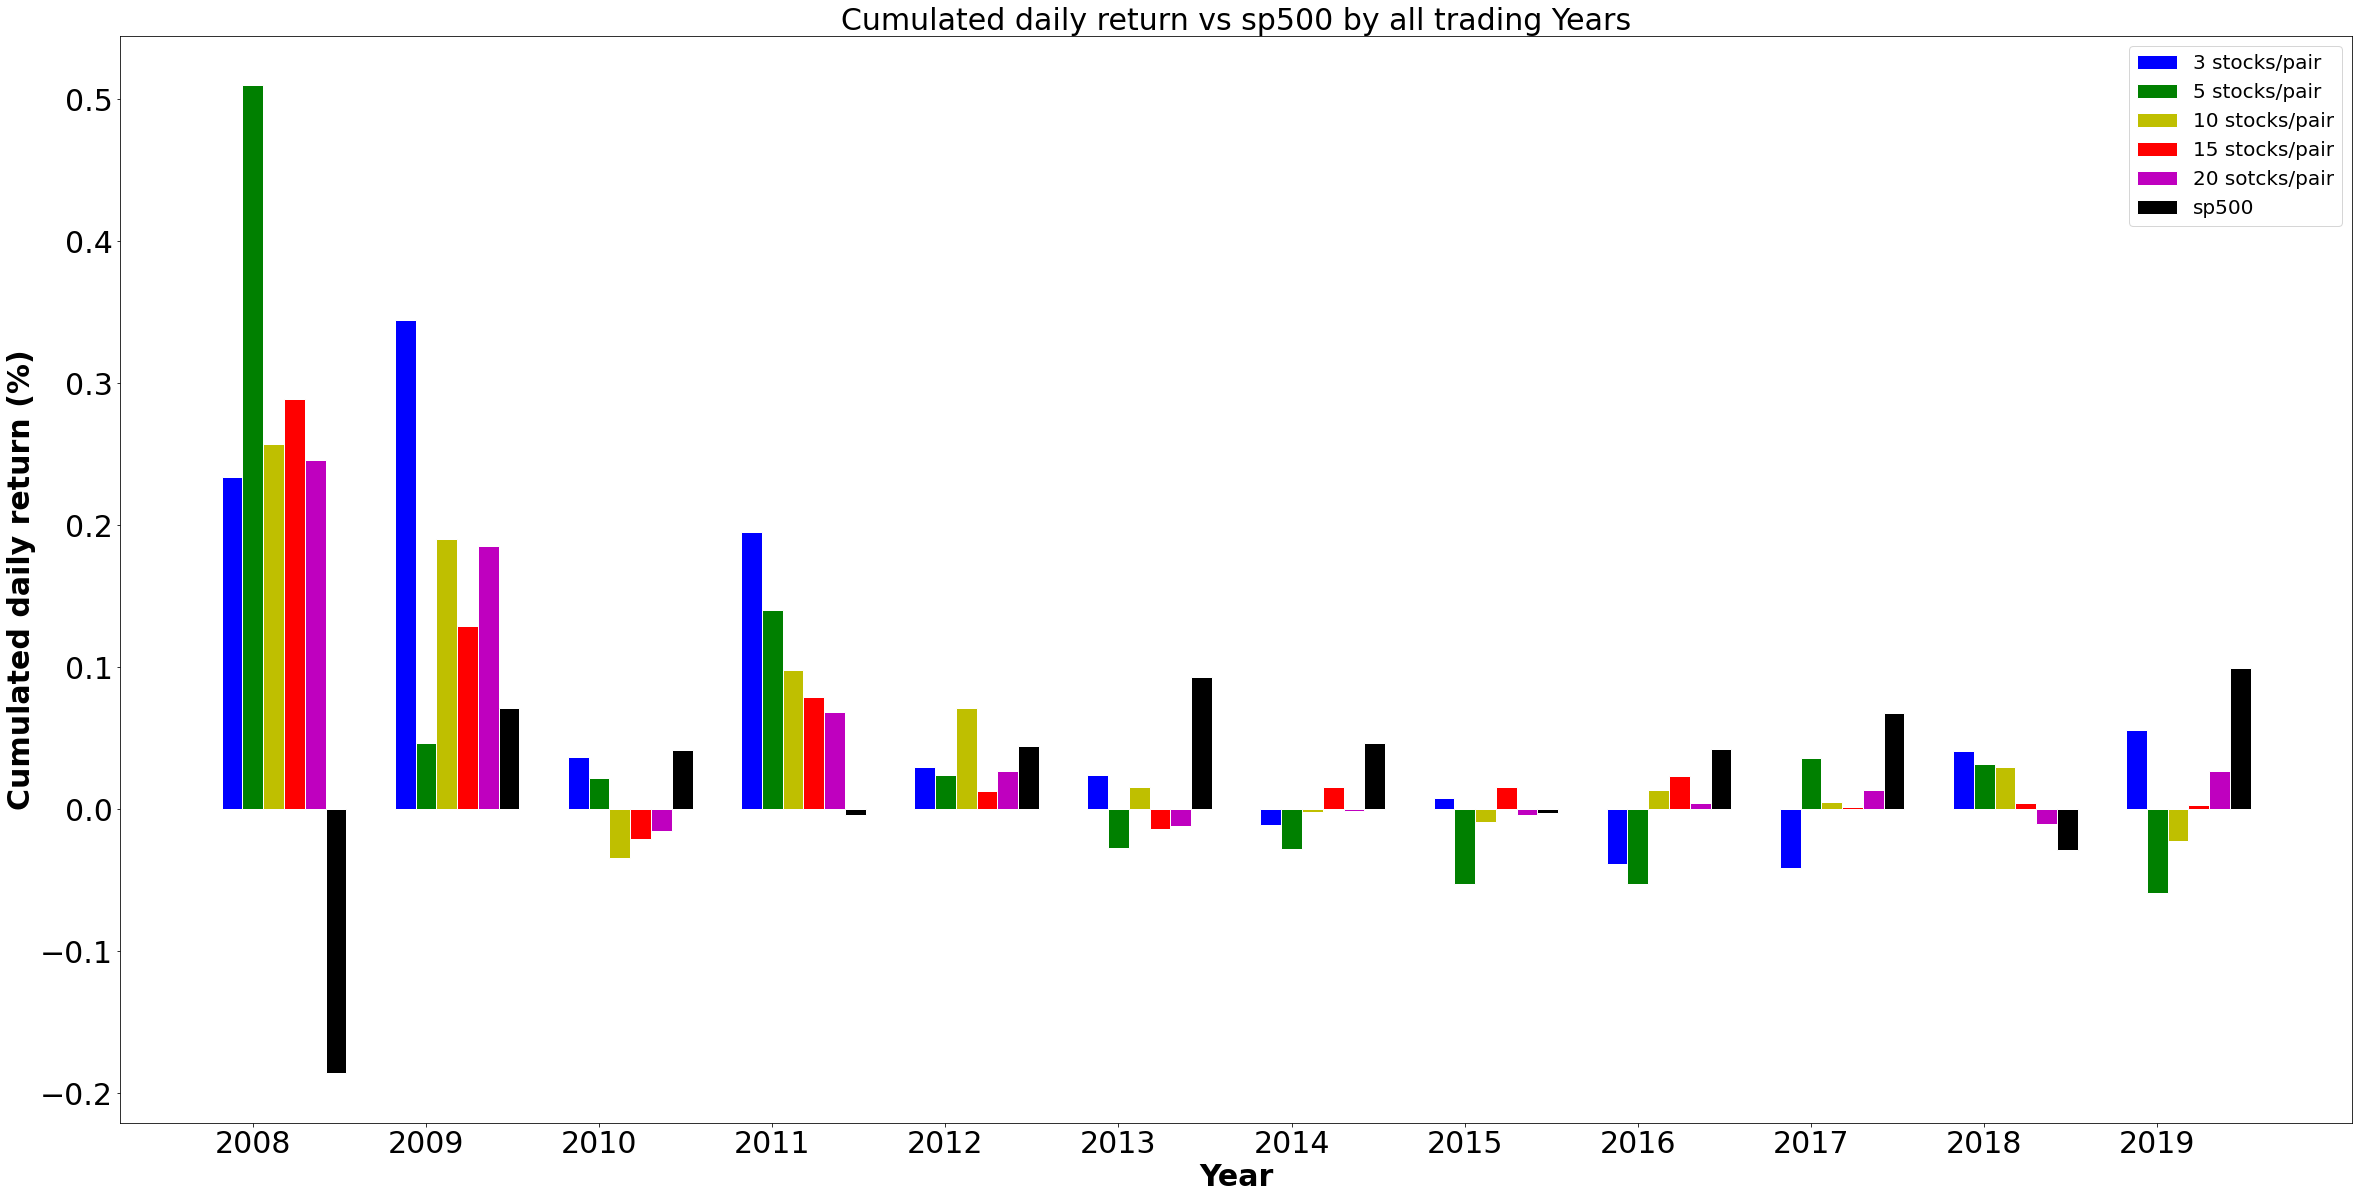

In [18]:
barWidth = 0.12
fig = plt.figure(figsize = (40,20))
# set height of bar
bars1 = df_avg['sel3']
bars2 = df_avg['sel5']
bars3 = df_avg['sel10']
bars4 = df_avg['sel15']
bars5 = df_avg['sel20']
bars6 = df_avg['sp500']

# Set position of bar on X axis
r1 = np.arange(len(bars1))
#print(r1)
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
#print(r2)

# Make the plot
plt.bar(r1, bars1, color='b', width=barWidth, edgecolor='white', label='3 stocks/pair')
plt.bar(r2, bars2, color='g', width=barWidth, edgecolor='white', label='5 stocks/pair')
plt.bar(r3, bars3, color='y', width=barWidth, edgecolor='white', label='10 stocks/pair')
plt.bar(r4, bars4, color='r', width=barWidth, edgecolor='white', label='15 stocks/pair')
plt.bar(r5, bars5, color='m', width=barWidth, edgecolor='white', label='20 sotcks/pair')
plt.bar(r6, bars6, color='k', width=barWidth, edgecolor='white', label='sp500')
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
 
# Add xticks on the middle of the group bars
plt.xlabel('Year', fontweight='bold',fontsize=30)
plt.ylabel('Cumulated daily return (%)', fontweight = 'bold',fontsize=30)
plt.xticks([r + barWidth for r in range(len(bars1))], ['2008', '2009', '2010', '2011', '2012', '2013','2014','2015','2016','2017','2018','2019'])
plt.title('Cumulated daily return vs sp500 by all trading Years',fontsize=30)
 
# Create legend & Show graphic
plt.legend(fontsize=20)
plt.show()
fig.savefig('plot_all_pairs_new.png', bbox_inches='tight')

In [56]:
train_acc = dict()
train_acc['knn'] = [0.6281, 1, 1, 0.6385, 0.6384, 1, 1, 1, 1, 1, 1, 1]
train_acc['lg'] = [0.5093, 0.5133, 0.5103, 0.5065, 0.5071, 0.5081, 0.5103, 0.5095, 0.5096, 0.51, 0.5112, 0.5129]
train_acc['raf'] = [0.5649, 0.5832, 0.5898, 0.5701, 0.5864, 0.5896, 0.5852, 0.5857, 0.5797, 0.579, 0.5733, 0.5708]
train_acc['xgb'] = [0.6922, 0.7333, 0.728, 0.8253, 0.8197, 0.8161, 0.7369, 0.68, 0.6544, 0.7088, 0.713, 0.7148]
train_acc['esm1'] = [0.6188, 0.7502, 0.767, 0.6619, 0.6903, 0.7975, 0.7553, 0.7363, 0.7252, 0.7402, 0.7427, 0.7371]
train_acc['esm2'] = [0.679, 0.9469, 0.9996, 0.8166, 0.8077, 0.99994, 0.99993, 0.9996, 0.9975, 0.9989, 0.9998, 0.99999]
train_acc['ml'] = [0.509, 0.5114, 0.5299, 0.5016, 0.5008, 0.5008, 0.5177, 0.5111, 0.5164, 0.5099, 0.5005, 0.5118]
train_acc = pd.DataFrame(train_acc)
train_acc.columns = ['knn','lg','rag','xgb','esm1','esm2','ml']
del train_acc['knn']

test_acc = dict()
test_acc['knn'] = [0.5054, 0.5099, 0.536, 0.5217, 0.5221, 0.5357, 0.5238, 0.523, 0.5336, 0.5431, 0.5413, 0.5376]
test_acc['lg'] = [0.5052, 0.5095, 0.5099, 0.5028, 0.5091, 0.5028, 0.502, 0.5098, 0.5037, 0.5069, 0.5079, 0.5117]
test_acc['raf'] = [0.5148, 0.5189, 0.5282, 0.5226, 0.5246, 0.5257, 0.5173, 0.517, 0.5211, 0.5193, 0.5197, 0.5202]
test_acc['xgb'] = [0.5193, 0.5277, 0.5399, 0.5387, 0.5338, 0.5332, 0.5167, 0.5226, 0.5242, 0.5294, 0.5284, 0.5275]
test_acc['esm1'] = [0.515, 0.52, 0.5348, 0.5238, 0.5334, 0.5301, 0.5164, 0.5239, 0.5277, 0.5329, 0.5327, 0.5313]
test_acc['esm2'] = [0.5214, 0.5285, 0.5455, 0.5394, 0.5387, 0.5427, 0.5253, 0.5354, 0.5388, 0.5498, 0.5478, 0.542]
test_acc['ml'] = [0.503, 0.5067, 0.5277, 0.4953, 0.5047, 0.5047, 0.5111, 0.5141, 0.5176, 0.5069, 0.5039, 0.5084]

test_acc = pd.DataFrame(test_acc)
test_acc.columns = ['knn','lg','rag','xgb','esm1','esm2','ml']

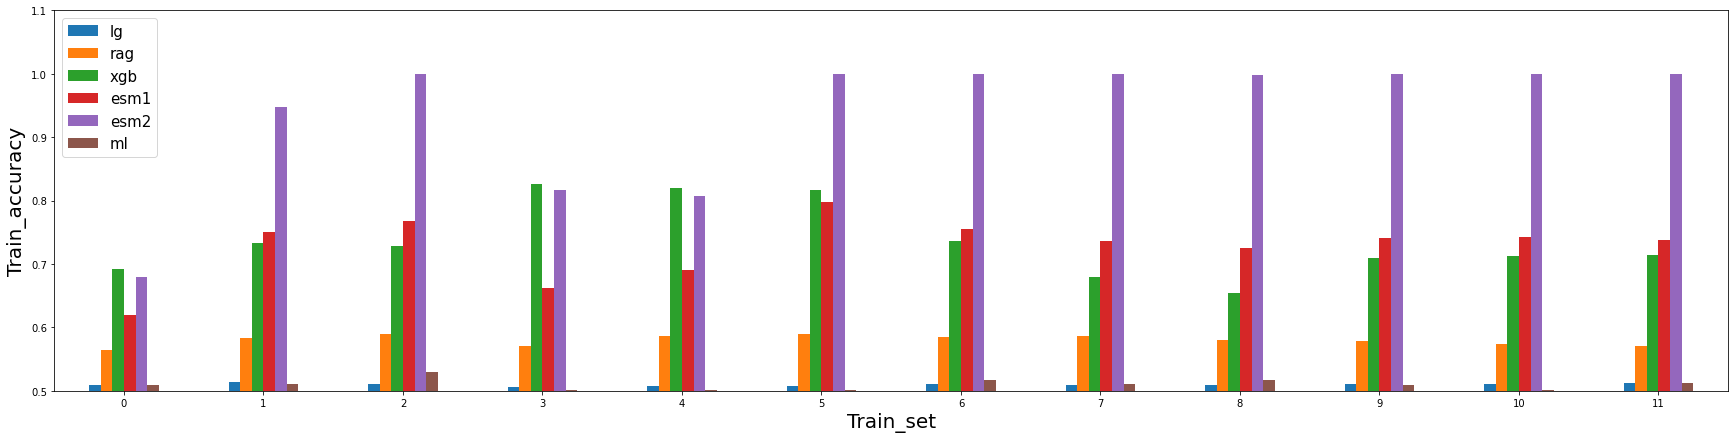

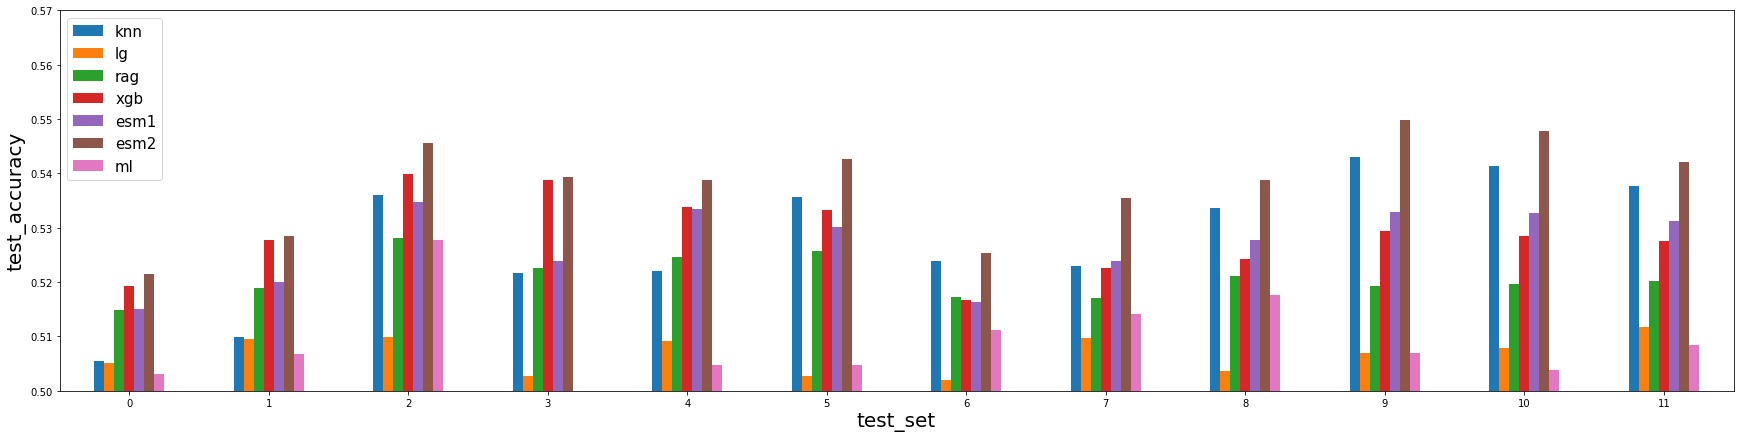

In [79]:
#fig = plt.figure(figsize = (10,10))
#fig, axs = plt.subplots(2,6, figsize=(30, 20), facecolor='w', edgecolor='k')
train_acc.plot.bar(figsize = (30,7),rot=0, ylim = [0.5,1.1], fontsize=10)
#plt.bar(train_acc)
plt.xlabel("Train_set",fontsize=20)
plt.ylabel("Train_accuracy",fontsize=20)
plt.legend(prop={'size': 15})
plt.show()

test_acc.plot.bar(figsize = (30,7),rot=0,ylim=[0.5,0.57],fontsize=10)
#plt.bar(train_acc)
plt.xlabel("test_set",fontsize=20)
plt.ylabel("test_accuracy",fontsize=20)
plt.legend(prop={'size': 15})
plt.show()

##### 